In [1]:
%load_ext dotenv
%dotenv 
import os
import sys
sys.path.append(os.getenv('SRC_DIR'))
from logger import get_logger
_logs = get_logger(__name__)

In [2]:
import dask.dataframe as dd
# import pandas as pd
# import numpy as np
import os
from glob import glob

c:\Users\Admin\miniconda3\envs\dsi_participant\lib\site-packages\dask\dataframe\_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_12480\1877569766.py:1: DeprecationWarning: The current Dask DataFrame implementation is deprecated. 
In a future release, Dask DataFrame will use new implementation that
contains several improvements including a logical query planning.
The user-facing DataFrame API will remain unchanged.

The new implementation is already available and can be enabled by
installing the dask-expr library:

    $ pip install dask-expr

and turning the query planning option on:

    >>> import dask
    >>> dask.config.set({'dataframe.query-planning': True})
    >>> import dask.dataframe as dd

API documentation for the new implementation is available at
https://docs.dask.org/en/stable/dask-expr-api.html

Any feedback can b

In [5]:
ft_dir = os.getenv("FEATURES_DATA")
ft_glob = glob(ft_dir+'/*.parquet')
# df = dd.read_parquet(ft_glob).compute().reset_index()

In [4]:
ft_glob

['../../05_src/data/features/stock_features.parquet\\part.0.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.1.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.10.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.100.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.101.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.102.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.103.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.104.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.105.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.106.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.107.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.108.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.109.parquet',
 '../../05_src/data/features/stock_features.parquet\\part.11.parquet'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2778696 entries, 0 to 2778695
Data columns (total 15 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ticker           object        
 1   Date             datetime64[ns]
 2   Open             float64       
 3   High             float64       
 4   Low              float64       
 5   Close            float64       
 6   Adj Close        float64       
 7   Volume           int64         
 8   sector           object        
 9   subsector        object        
 10  year             int32         
 11  Close_lag_1      float64       
 12  returns          float64       
 13  positive_return  int32         
 14  target           float64       
dtypes: datetime64[ns](1), float64(8), int32(2), int64(1), object(3)
memory usage: 296.8+ MB


# Sampling in Python

+ There are different packages that allow sampling.
+ A practical approach is to use pandas/Dask sampling methods.

## Random Sampling

+ Sample n rows from a dataframe with [`df.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html).

```
DataFrame.sample(
    n=None, frac=None, replace=False, weights=None, 
    random_state=None, axis=None, ignore_index=False
    )
```

In [12]:
df.sample(n = 5)

,ticker,Date,Open,High,Low,Close,Adj Close,Volume,sector,subsector,year,Close_lag_1,returns,positive_return,target
1835346,FDX,2006-08-01,104.500000,104.519997,101.849998,103.209999,86.256836,2563100,Industrials,Air Freight & Logistics,2006,104.709999,-0.014325,0,1.0
717608,GPC,2009-01-22,33.980000,34.509998,33.490002,34.060001,21.046652,2029000,Consumer Discretionary,Distributors,2009,34.810001,-0.021546,0,0.0
15474,STLD,2001-01-24,2.671875,2.703125,2.609375,2.640625,1.703259,120800,Materials,Steel,2001,2.671875,-0.011696,0,0.0
208445,LKQ,2023-07-11,57.939999,58.560001,57.650002,58.000000,56.176426,1517000,Consumer Discretionary,Distributors,2023,57.529999,0.008170,1,1.0
440526,TFX,2018-03-01,249.360001,250.770004,241.259995,242.669998,235.121292,368100,Health Care,Health Care Equipment,2018,249.830002,-0.028660,0,1.0


In [13]:
# select_tickers = df['ticker'].unique().tolist()[0:9]
select_tickers = ['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']
select_tickers

['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']

In [14]:
df.ticker

0           HUM
1           HUM
2           HUM
3           HUM
4           HUM
           ... 
2778691    JNPR
2778692    JNPR
2778693    JNPR
2778694    JNPR
2778695    JNPR
Name: ticker, Length: 2778696, dtype: object

In [18]:
idx = df['ticker'].isin(select_tickers)
sum(idx)


55073

In [19]:
idx = df['ticker'].isin(select_tickers)
df[idx]

,ticker,Date,Open,High,Low,Close,Adj Close,Volume,sector,subsector,year,Close_lag_1,returns,positive_return,target
490876,CBRE,2004-06-10,6.333333,6.336667,6.033333,6.116667,6.116667,35097600,Real Estate,Real Estate Services,2004,43.310001,-0.858770,0,0.0
490877,CBRE,2004-06-14,6.083333,6.126667,6.053333,6.066667,6.066667,2313600,Real Estate,Real Estate Services,2004,6.116667,-0.008174,0,1.0
490878,CBRE,2004-06-15,6.070000,6.250000,6.070000,6.250000,6.250000,2499600,Real Estate,Real Estate Services,2004,6.066667,0.030220,1,1.0
490879,CBRE,2004-06-16,6.250000,6.366667,6.250000,6.333333,6.333333,2810100,Real Estate,Real Estate Services,2004,6.250000,0.013333,1,1.0
490880,CBRE,2004-06-17,6.353333,6.366667,6.266667,6.350000,6.350000,1390200,Real Estate,Real Estate Services,2004,6.333333,0.002632,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703787,PCG,2024-10-18,20.340000,20.389999,20.170000,20.379999,20.379999,6607100,Utilities,Multi-Utilities,2024,20.280001,0.004931,1,0.0
2703788,PCG,2024-10-21,20.480000,20.650000,20.280001,20.350000,20.350000,9272500,Utilities,Multi-Utilities,2024,20.379999,-0.001472,0,1.0
2703789,PCG,2024-10-22,20.260000,20.670000,20.240000,20.570000,20.570000,7721300,Utilities,Multi-Utilities,2024,20.350000,0.010811,1,1.0
2703790,PCG,2024-10-23,20.490000,20.600000,20.330000,20.580000,20.580000,8298500,Utilities,Multi-Utilities,2024,20.570000,0.000486,1,1.0


In [20]:
idx = df['ticker'].isin(select_tickers)
small_df = df[idx]
simple_sample_dt = small_df.sample(frac = 0.1)
# simple_sample_dt.shape, small_df.shape

In [22]:
small_df.shape

(55073, 15)

In [23]:
simple_sample_dt

,ticker,Date,Open,High,Low,Close,Adj Close,Volume,sector,subsector,year,Close_lag_1,returns,positive_return,target
1909169,TXN,2021-09-02,189.210007,189.419998,188.039993,189.410004,173.723099,2061400,Information Technology,Semiconductors,2021,188.350006,0.005628,1,1.0
493913,CBRE,2016-07-05,25.680000,25.719999,24.110001,24.540001,24.540001,7505600,Real Estate,Real Estate Services,2016,25.930000,-0.053606,0,1.0
508082,D,2023-03-13,53.020000,55.480000,52.919998,54.200001,50.042374,5463400,Utilities,Multi-Utilities,2023,53.209999,0.018606,1,1.0
491837,CBRE,2008-04-07,21.889999,22.530001,21.610001,21.850000,21.850000,2188100,Real Estate,Real Estate Services,2008,21.680000,0.007841,1,0.0
1905994,TXN,2009-01-23,14.150000,15.320000,13.920000,14.990000,10.028716,18915200,Information Technology,Semiconductors,2009,14.360000,0.043872,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667938,PWR,2003-08-25,8.400000,8.460000,8.200000,8.390000,8.241718,978900,Industrials,Construction & Engineering,2003,8.320000,0.008414,1,1.0
1815298,OXY,2001-05-01,14.428405,14.433195,13.987697,14.131406,7.546895,4484264,Energy,Oil & Gas Exploration & Production,2001,14.428405,-0.020584,0,0.0
1923897,ROK,2005-07-26,54.000000,54.299999,53.070000,53.680000,35.650642,1291100,Industrials,Electrical Components & Equipment,2005,53.820000,-0.002601,0,0.0
669454,PWR,2009-09-01,22.000000,22.780001,21.400000,21.500000,21.120018,3040500,Industrials,Construction & Engineering,2009,22.120001,-0.028029,0,1.0


In [24]:
simple_sample_dt.shape

(5507, 15)

In [21]:
idx = df['ticker'].isin(select_tickers)
small_df = df[idx]
simple_sample_dt = small_df.sample(frac = 0.1)
simple_sample_dt.shape, small_df.shape

((5507, 15), (55073, 15))

Look at the distribution of tickers.

In [25]:
small_df['ticker'].value_counts()

ticker
D       6243
PWR     6243
AMT     6243
YUM     6243
OXY     6243
TXN     6243
ROK     6243
PCG     6243
CBRE    5129
Name: count, dtype: int64

<Axes: xlabel='ticker'>

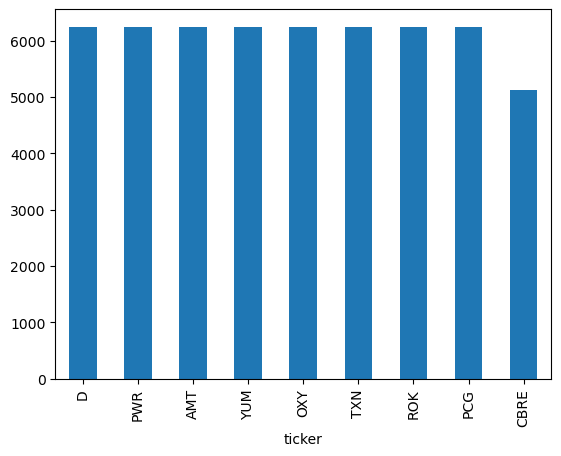

In [27]:
small_df['ticker'].value_counts().plot(kind='bar')

<Axes: xlabel='ticker'>

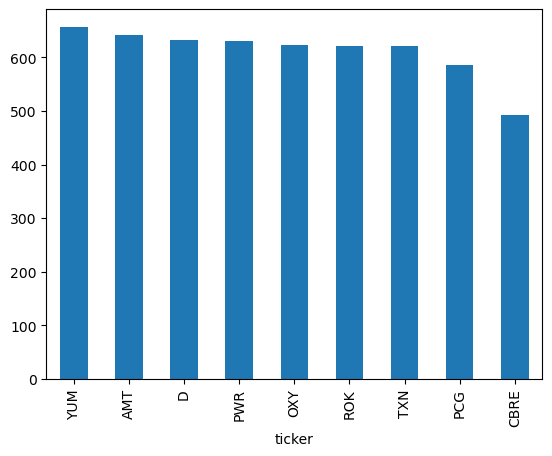

In [26]:
simple_sample_dt['ticker'].value_counts().plot(kind='bar')

## Stratified Sampling

+ Use `groupby()` and `.sample()` for stratified sampling.

In [ ]:
strat_sample_dt = small_df.groupby(['ticker']).sample(frac = 0.1)
strat_sample_dt['ticker'].value_counts().plot(kind='bar')

In [28]:
small_df.groupby(['ticker']).sample(frac = 0.1)

,ticker,Date,Open,High,Low,Close,Adj Close,Volume,sector,subsector,year,Close_lag_1,returns,positive_return,target
1653571,AMT,2018-08-02,149.789993,150.360001,148.139999,148.210007,127.459381,1877100,Real Estate,Telecom Tower REITs,2018,150.169998,-0.013052,0,1.0
1649040,AMT,2000-07-28,43.500000,43.562500,41.500000,41.812500,31.926441,530300,Real Estate,Telecom Tower REITs,2000,43.625000,-0.041547,0,1.0
1651031,AMT,2008-07-01,41.610001,41.740002,39.599998,40.580002,30.985361,10231800,Real Estate,Telecom Tower REITs,2008,42.250000,-0.039527,0,0.0
1653942,AMT,2020-01-24,238.000000,239.990005,236.720001,237.520004,210.196869,1284800,Real Estate,Telecom Tower REITs,2020,237.830002,-0.001303,0,0.0
1650883,AMT,2007-11-28,44.200001,45.090000,44.060001,44.630001,34.077785,4739700,Real Estate,Telecom Tower REITs,2007,43.959999,0.015241,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725780,YUM,2014-06-13,56.599567,57.066856,56.254494,56.959023,46.858570,2403509,Consumer Discretionary,Restaurants,2014,56.628326,0.005840,1,0.0
1725758,YUM,2014-05-13,55.104240,55.248024,54.823868,54.974838,45.226246,2528003,Consumer Discretionary,Restaurants,2014,54.730412,0.004466,1,0.0
1724331,YUM,2008-09-10,27.368799,27.742632,27.066858,27.332853,19.932878,4306119,Consumer Discretionary,Restaurants,2008,27.325665,0.000263,1,1.0
1723358,YUM,2004-10-28,15.647017,15.700935,15.470884,15.643422,10.865687,2902739,Consumer Discretionary,Restaurants,2004,15.647017,-0.000230,0,0.0


<Axes: xlabel='ticker'>

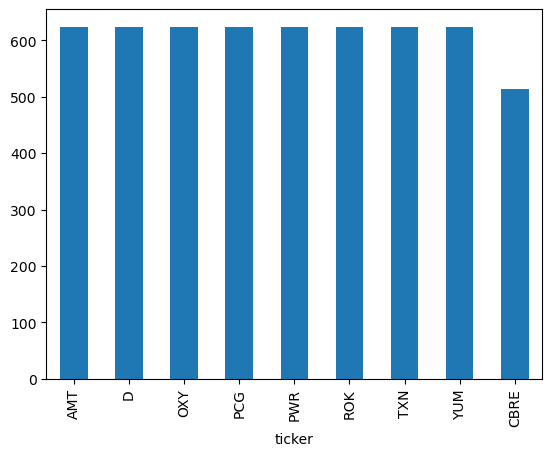

In [29]:
strat_sample_dt = small_df.groupby(['ticker']).sample(frac = 0.1)
strat_sample_dt['ticker'].value_counts().plot(kind='bar')

# Sampling in Dask

+ Stratified sampling in `dask` can be achieved with `groupby().apply()` and a lambda function.

C:\Users\Admin\AppData\Local\Temp\ipykernel_12480\2932236319.py:2: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  strat_sample_dd_dt = (dd_dt


<Axes: xlabel='ticker'>

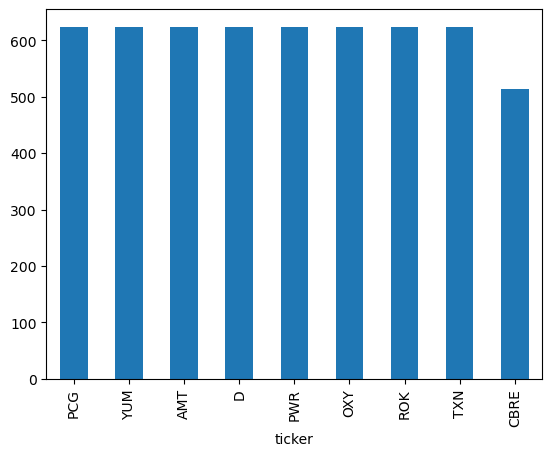

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\Admin\miniconda3\envs\dsi_participant\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\Admin\miniconda3\envs\dsi_participant\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\Admin\miniconda3\envs\dsi_participant\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\Admin\miniconda3\envs\dsi_participant\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4

In [30]:
dd_dt = dd.read_parquet(ft_glob)
strat_sample_dd_dt = (dd_dt
                      .groupby('ticker', group_keys=False)
                      .apply(lambda x: x.sample(frac = 0.1))
                      .compute()
                      .reset_index())
strat_sample_dd_dt[strat_sample_dd_dt['ticker'].isin(select_tickers)]['ticker'].value_counts().plot(kind='bar')